# PERSONAL CHEAT-SHEET DataFrames
###############################################################################################

## TWO WAYS to select values in a DF by a condition:

In [ ]:
#df[ CONDITION ][[ Columns ]] : e.g.:
sales[(sales['qty']>24) & (sales['qty']<46)][['ord_num', 'qty']]


#df.loc[ CONDITION, [ Columns ]], e.g.:
sales.loc[(sales['qty']>24) & (sales['qty']<46), ['ord_num', 'qty']]

# further you can also apply these conditions only on specific columns of the df as:
#df[specific columns].loc[ CONDITION, [ Columns ]],

## create a new column in DataFrame:

In [ ]:
titles.loc[titles.price <= 5, ['price_category']] = 'super low'
titles.loc[titles.price <= 10, ['price_category']] = 'low'
titles.loc[titles.price <= 15, ['price_category']] = 'medium'
titles.loc[titles.price > 15, ['price_category']] = 'high'
titles.head()

## create a new column in the DataFrame based on a condition:

In [ ]:
import numpy as np
titles['price_category'] = np.where(titles['price']>15 , 'high price', 
                                    np.where(titles['price'].between(10,15), 'medium price', 
                                    np.where(titles['price'].between(5,10), 'low price',  'super low price')))
titles.loc[titles['type'].isin(['business','trad_cook','psychology'])].groupby(['pub_id','price_category']).agg({'price':'mean'}).round()

###############################################################################################
###############################################################################################
###############################################################################################
###############################################################################################
###############################################################################################

# A quick recap on Pandas DataFrames

Pandas DataFrames are mutable two-dimensional structures of data with labeled axes where:
* each row represents a different observation
* each column represents a different variable

As always, we first need to import the Pandas module:

In [3]:
import pandas as pd

## 1.&nbsp; Import a csv file to DataFrame

Most of the time, you will not be creating DataFrames yourself, but importing (or "reading") data from a csv file or a database into a pandas DataFrame. It's easy to do with pandas' read functions. We will read one of the datasets from the Eniac project, which we have stored in a Google Drive folder:

In [4]:
#url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
#path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
#df = pd.read_csv(path)

df = pd.read_csv('orderlines.csv')
df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


In [15]:
brands = pd.read_csv('brands.csv')
brands.info()
brands#.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   short   187 non-null    object
 1   long    187 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB


,short,long
0,8MO,8Mobility
1,ACM,Acme
2,ADN,Adonit
3,AII,Aiino
4,AKI,Akitio
...,...,...
182,XOO,Xoopar
183,XRI,X-Rite
184,XTO,Xtorm
185,ZAG,ZaggKeys


In [37]:
orders = pd.read_csv('orders.csv')
orders.info()
orders.nunique()
#orders.state.value_counts()#.sum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226909 entries, 0 to 226908
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      226909 non-null  int64  
 1   created_date  226909 non-null  object 
 2   total_paid    226904 non-null  float64
 3   state         226909 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.9+ MB


order_id        226909
created_date    224828
total_paid       31236
state                5
dtype: int64

In [120]:
url = "https://drive.google.com/file/d/1afxwDXfl-7cQ_qLwyDitfcCx3u7WMvkU/view?usp=sharing" # products.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products = pd.read_csv(path)
products

# products = pd.read_csv('products.csv')
# products

,sku,name,desc,price,promo_price,in_stock,type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364
...,...,...,...,...,...,...,...
19321,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,269.903,1,12282
19322,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19323,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,649.903,1,1392
19324,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,649.903,0,1392


## 2.&nbsp; DataFrame dimensions

With the [DataFrame.shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) attribute we can calculate the dimensions (number of rows and columns) of the DataFrame.

In [18]:
df.shape

(293983, 7)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


As a result we obtain a [tuple](https://www.w3schools.com/python/python_tuples.asp) where the first element is the number of rows, which in our case is 293983, while the second element is the number of columns, which in our example was 7.

In [20]:
nrows = df.shape[0]
ncols = df.shape[1]
print("The number of rows is", nrows)
print("The number of columns is", ncols)

The number of rows is 293983
The number of columns is 7


[DataFrame.size](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html) returns the total number of values that the DataFrame has (the number of rows multiplied by the number of columns):

In [21]:
df.size

2057881

We can check if the `.size` and `.shape` agree

In [22]:
df.shape[0] * df.shape[1] == df.size

True

With the [DataFrame.ndim](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ndim.html) attribute we calculate the number of dimensions that the DataFrame has. This will always be 2, as it consists of rows and columns.

In [23]:
df.ndim

2

## 3.&nbsp; DataFrames exploration

The [DataFrame.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [DataFrame.tail()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) methods are used to display the first or last rows of the DataFrame. Looking at the raw data is a great way to get a grasp of what's in there. By default, 5 rows will be shown, but you can change that:

In [24]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


In [25]:
df.head(9)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
5,1119114,295310,0,10,WDT0249,231.79,2017-01-01 01:14:27
6,1119115,299544,0,1,APP1582,1.137.99,2017-01-01 01:17:21
7,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16
8,1119119,299546,0,1,IOT0014,18.99,2017-01-01 01:50:34


In [26]:
df.tail()

,id,id_order,product_id,product_quantity,sku,unit_price,date
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01
293982,1650203,527401,0,1,APP0927,13.99,2018-03-14 13:58:36


The methods [DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), [DataFrame.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) and [DataFrame.nunique()](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html) give a general overview of what's in the DataFrame:

`.info()` tells us about how pandas sees the data - how it is stored, whether there's any missing values, and how many columns and rows we have.

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


`.describe()` gives us an overview of the [descriptive statistics](https://www.scribbr.com/statistics/descriptive-statistics/) for the numerical columns of our DataFrame.

In [177]:
df.describe()

,id,id_order,product_id,product_quantity
count,2.939830e+05,293983.000000,293983.0,293983.000000
mean,1.397918e+06,419999.116544,0.0,1.121126
std,1.530096e+05,66344.486479,0.0,3.396569
min,1.119109e+06,241319.000000,0.0,1.000000
25%,1.262542e+06,362258.500000,0.0,1.000000
50%,1.406940e+06,425956.000000,0.0,1.000000
75%,1.531322e+06,478657.000000,0.0,1.000000
max,1.650203e+06,527401.000000,0.0,999.000000


In [29]:
df.nunique()

id                  293983
id_order            204855
product_id               1
product_quantity        67
sku                   7951
unit_price           11329
date                251631
dtype: int64

If we wish, we can also view the unique values counted by `series.nunique()`. The [.unique()](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) method returns the unique values from a column as a numpy array, which can be indexed with `[]`:

In [ ]:
df["sku"].unique()[:10]

array(['OTT0133', 'LGE0043', 'PAR0071', 'WDT0315', 'JBL0104', 'WDT0249',
       'APP1582', 'OWC0100', 'IOT0014', 'APP0700'], dtype=object)

## CHECK FOR MISSING VALUES IN THE df, e.g. NaN

The [DataFrame.isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) method returns a boolean for each value: `True` if that value is "missing" (which is represented as `NaN` in numpy and pandas) and `False` if the value is not missing:

In [174]:
df.isna()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
293978,False,False,False,False,False,False,False
293979,False,False,False,False,False,False,False
293980,False,False,False,False,False,False,False
293981,False,False,False,False,False,False,False


We can then use [DataFrame.sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) to add up all these booleans for each column, and count how many missing values are there in the DataFrame, since `True` is interpreted as `1` and `False` as `0`:

In [40]:
df.isna().sum()

id                  0
id_order            0
product_id          0
product_quantity    0
sku                 0
unit_price          0
date                0
dtype: int64

## CHECK FOR EQUAL ROWS IN THE df

[DataFrame.duplicated()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) also returns a boolean output, but in this case just one value per row: `True` if that row is duplicated and `False` if it's not. Again, using `sum()` allows us to count how many `True` values (i.e. duplicated rows) are there in total:

In [41]:
df.duplicated().sum()

0

[DataFrame.nlargest(n, columns)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html) will return the top `n` rows with the largest value for whatever column we specify in `columns`. Below, we see the rows with the largest product quantity values:

In [158]:
df.nlargest(5, "product_quantity")

,id,id_order,product_id,product_quantity,sku,unit_price,date
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53


[DataFrame.nsmallest()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nsmallest.html) does the same, for the smallest values:

In [54]:
df.nsmallest(5, "product_quantity")
df.loc[df["product_quantity"]==1, :].count()

id                  277058
id_order            277058
product_id          277058
product_quantity    277058
sku                 277058
unit_price          277058
date                277058
dtype: int64

So far, we have seen two ways to explore DataFrames:

* **Attributes:** `.shape`, `.size` and `.ndim`, and others. They are written without parentheses and give you raw "metadata" about the DataFrame you are calling them on.
* **Methods:** `.head()`, `.describe()` and `.isna()`, and others. They are written with parentheses and perform some sort of calculation, transformation or aggregation. A method is like a function that is tied to a specific object type.

DataFrames have a lot of attributes and methods and may not be obvious whether something belongs to one type or the other. Whenever in doubt, check [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html?highlight=DataFrame#pandas.DataFrame). If you scroll down past the list of examples you will find two sections listing all the attributes and methods.

## 4.&nbsp; Select Columns

Given a DataFrame, we can select a particular column in several ways:

* Indicating the name of the column between square brackets, `[]`
* With the `.loc[]` attribute (by name or tag)
* With the `.iloc[]` attribute (by position)

Plain square brackets `[]` are used to just view a column if you know its name and **don't want to modify it**:

In [ ]:
df["id_order"]

0         299539
1         299540
2         299541
3         299542
4         299543
           ...  
293978    527398
293979    527399
293980    527400
293981    527388
293982    527401
Name: id_order, Length: 293983, dtype: int64

`.loc[]` takes two arguments: `[rows, columns]`. Passing `:` to the rows argument means "grabbing all the rows", which allows you to select a whole column, if you know its name. This method is more flexible as you will see in the future, and allows you to modify the data.

We recommend using `loc[]` as the primary option for selecting data.

In [55]:
df.loc[:, "id_order"]

0         299539
1         299540
2         299541
3         299542
4         299543
           ...  
293978    527398
293979    527399
293980    527400
293981    527388
293982    527401
Name: id_order, Length: 293983, dtype: int64

`.iloc[]` works similarly to `.loc[]`, but it only accepts integers, which represent the positions of the rows and columns:

In [56]:
df.iloc[:, 1]

0         299539
1         299540
2         299541
3         299542
4         299543
           ...  
293978    527398
293979    527399
293980    527400
293981    527388
293982    527401
Name: id_order, Length: 293983, dtype: int64

### 4.1.&nbsp; Select multiple columns

If we want to select more than one column, we can do it with all the options listed above, with slight modifications in some cases:

> **Note:** we pass a list inside of the `[]`, a list is also represented by `[]`, hence why we have 2 sets of square brackets

In [57]:
df[["id_order","sku"]]

,id_order,sku
0,299539,OTT0133
1,299540,LGE0043
2,299541,PAR0071
3,299542,WDT0315
4,299543,JBL0104
...,...,...
293978,527398,JBL0122
293979,527399,PAC0653
293980,527400,APP0698
293981,527388,BEZ0204


In [58]:
df.loc[:, ["id_order", "sku"]]

,id_order,sku
0,299539,OTT0133
1,299540,LGE0043
2,299541,PAR0071
3,299542,WDT0315
4,299543,JBL0104
...,...,...
293978,527398,JBL0122
293979,527399,PAC0653
293980,527400,APP0698
293981,527388,BEZ0204


With `.loc[]` and `:` you can select all columns between two columns you specify.

In [59]:
df.loc[:, "id_order":"sku"]

,id_order,product_id,product_quantity,sku
0,299539,0,1,OTT0133
1,299540,0,1,LGE0043
2,299541,0,1,PAR0071
3,299542,0,1,WDT0315
4,299543,0,1,JBL0104
...,...,...,...,...
293978,527398,0,1,JBL0122
293979,527399,0,1,PAC0653
293980,527400,0,2,APP0698
293981,527388,0,1,BEZ0204


In [60]:
df.iloc[:, [1, 4]]

,id_order,sku
0,299539,OTT0133
1,299540,LGE0043
2,299541,PAR0071
3,299542,WDT0315
4,299543,JBL0104
...,...,...
293978,527398,JBL0122
293979,527399,PAC0653
293980,527400,APP0698
293981,527388,BEZ0204


In [61]:
df.iloc[:, 1:5]

,id_order,product_id,product_quantity,sku
0,299539,0,1,OTT0133
1,299540,0,1,LGE0043
2,299541,0,1,PAR0071
3,299542,0,1,WDT0315
4,299543,0,1,JBL0104
...,...,...,...,...
293978,527398,0,1,JBL0122
293979,527399,0,1,PAC0653
293980,527400,0,2,APP0698
293981,527388,0,1,BEZ0204


## 5.&nbsp; Select Rows

Selecting rows is easy if you know how to select columns. You have two options:

* With `.loc[]` (by name or tag)
* With `.iloc[]` (by position)

Selecting a single row returns a pandas Series (a 1-dimensional object):

In [62]:
df.loc[0, :]

id                              1119109
id_order                         299539
product_id                            0
product_quantity                      1
sku                             OTT0133
unit_price                        18.99
date                2017-01-01 00:07:19
Name: 0, dtype: object

With `.loc[]`, rows are selected by their index name:

In [63]:
df.loc[0:3, :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40


If we change the index and set it to the `id` column, now the first rows can not be selected the same way:
> **Note:** `inplace = True` is the same as doing `df = df.set_index("id")`, i.e. it modifies the DataFrame

In [70]:
df.set_index("id", inplace=True) # use the id column as Index column rather that the normal index line numbers

In [73]:
df

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...
1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41


Look, the same code as above no longer works. The index has been changed to the `id` column, if we want to use `.loc` we now need to use the names/numbers from `id`

In [74]:
df.loc[0:3, :]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,


In [76]:
df.loc[1119109:1119112, :]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40


You can always tell the index column as it will be in bold

With the `.iloc[]` method we don't need to know the row names to select rows at a certain position. Every row and column is instead nominally indexed, starting from the number 0:

In [77]:
df.iloc[0:4]

,id_order,product_id,product_quantity,sku,unit_price,date
id,,,,,,
1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40


We can select the last observation with the method `.iloc[]` by using negative numbers

In [78]:
df.iloc[-1]

id_order                         527401
product_id                            0
product_quantity                      1
sku                             APP0927
unit_price                        13.99
date                2018-03-14 13:58:36
Name: 1650203, dtype: object

We can, whenever necessary, reset the index to a set of numbers starting from 0. This would also make the `id` column a normal column once again

In [79]:
df.reset_index(inplace=True)

Indexing can get tricky sometimes, it's ok to take some time to get used to the methods we presented, and it's ok to have some trouble selecting the rows and columns you need. For an exhaustive guide on Pandas indexing, check out this link: https://pandas.pydata.org/docs/user_guide/indexing.html#indexing

In [80]:
df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


## 6.&nbsp; Drop Columns

The `.drop()` method allows us to delete the rows or columns.

> **Note:** Again, if we want to directly apply the changes to the original DataFrame, we need to indicate `inplace = True`. Otherwise, we are getting as an output just a "view" of how the DataFrame looks like after the drop, but the original DataFrame remains unchanged.

> **Note:** `axis=1` means we want to drop a column, not a row. For rows we would use `axis=0`

In [81]:
df.drop(["unit_price"], axis=1)

,id,id_order,product_id,product_quantity,sku,date
0,1119109,299539,0,1,OTT0133,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,2017-01-01 01:06:38
...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,2018-03-14 13:58:01


See how our output above shows no column `unit_price`. Then look at the output below, `unit_price` is magically back. We didn't use `inplace=True` above, which means that our output displayed what we asked, but didn't alter the original DataFrame. Be careful of this, Pandas only changes data if you explicitly tell it to do so.

In [82]:
df

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
...,...,...,...,...,...,...,...
293978,1650199,527398,0,1,JBL0122,42.99,2018-03-14 13:57:25
293979,1650200,527399,0,1,PAC0653,141.58,2018-03-14 13:57:34
293980,1650201,527400,0,2,APP0698,9.99,2018-03-14 13:57:41
293981,1650202,527388,0,1,BEZ0204,19.99,2018-03-14 13:58:01


## 7.&nbsp; Filter rows based on conditions

Using `.loc` to filter for rows that have a `product_quantity greater than 100`

In [83]:
df.loc[df["product_quantity"] > 100, :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
136675,1388261,417536,0,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,0,164,EVU0013,19.99,2018-01-22 16:14:42
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


The `.query()` method can be useful for this purpose. Some of you may prefer it as it resembles SQL syntax. You can use any **Python Comparison Operators** you want inside the query method (find more information on this [link](https://www.w3schools.com/python/python_operators.asp)).
> **Note:** `.query()` only works when the named column does not contain any white space and string values are contained within a separate set of quotes (the string value may contain white space). For example, if you have a column `a b` and you wish to query it `df.query("a b == 5")`, this would throw up an error. For column names you should always be using an underscore `_` not a space.

In [86]:
df.query("product_quantity > 100")

,id,id_order,product_id,product_quantity,sku,unit_price,date
27779,1180010,323959,0,126,ADN0039,34.99,2017-02-14 10:21:12
40813,1204788,335057,0,201,THU0029,80.99,2017-03-14 15:25:53
53860,1228150,346221,0,999,APP1190,55.99,2017-04-14 21:50:52
57306,1234111,349133,0,555,APP0665,70.99,2017-04-24 10:20:13
57796,1234924,349475,0,800,KIN0137,7.49,2017-04-25 09:59:00
68712,1254032,358747,0,999,SEV0028,19.99,2017-05-24 14:51:58
136675,1388261,417536,0,200,TRK0009,29.99,2017-10-25 15:02:39
204637,1500715,464858,0,192,APP1662,519.00,2017-12-17 15:53:04
246048,1574262,496172,0,164,EVU0013,19.99,2018-01-22 16:14:42
285492,1637611,522075,0,125,XDO0047,25.99,2018-03-06 10:07:54


The `isin()` method is very useful to find rows that match any of the values you have **in a list**. For example, here we are searching for rows where its `sku` matches any of the 2 sku's we listed:

In [98]:
# find out a column that contains a list
df["sku"].isin(["JBL0104", "ADN0039"])
list_sku = list(df["sku"].isin(["JBL0104", "ADN0039"]))
list_sku.count(True)

65

This expression can be used inside of `[]` or `.loc[]` to filter the rows that have a `True` value. This is called "boolean indexing" and it is really useful:

In [100]:
df.loc[df["sku"].isin(["JBL0104", "ADN0039"]), :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
716,1120463,300212,0,2,JBL0104,26.99,2017-01-02 01:44:05
774,1120607,300272,0,1,JBL0104,24.99,2017-01-02 08:57:07
866,1120758,300349,0,1,JBL0104,24.99,2017-01-02 10:41:29
1411,1122014,300851,0,1,JBL0104,24.99,2017-01-02 18:50:13
...,...,...,...,...,...,...,...
258180,1593360,503247,0,1,JBL0104,23.99,2018-01-31 20:55:50
263790,1601885,506553,0,1,JBL0104,24.99,2018-02-05 22:41:40
266635,1606326,508345,0,2,JBL0104,24.99,2018-02-08 19:20:21
268446,1608949,509377,0,1,JBL0104,24.99,2018-02-10 18:02:37


# Change the default number of rows that are displayed

Pandas compresses large outputs in Colab/Jupyter Notebooks. If you want to see more rows, you can change the options:
> **Note:** after running this cell, run the code above again and you will see all the rows
>

In [106]:
pd.options.display.max_rows = 50

In [107]:
df.loc[df["sku"].isin(["JBL0104", "ADN0039"]), :]

,id,id_order,product_id,product_quantity,sku,unit_price,date
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38
716,1120463,300212,0,2,JBL0104,26.99,2017-01-02 01:44:05
774,1120607,300272,0,1,JBL0104,24.99,2017-01-02 08:57:07
866,1120758,300349,0,1,JBL0104,24.99,2017-01-02 10:41:29
1411,1122014,300851,0,1,JBL0104,24.99,2017-01-02 18:50:13
...,...,...,...,...,...,...,...
258180,1593360,503247,0,1,JBL0104,23.99,2018-01-31 20:55:50
263790,1601885,506553,0,1,JBL0104,24.99,2018-02-05 22:41:40
266635,1606326,508345,0,2,JBL0104,24.99,2018-02-08 19:20:21
268446,1608949,509377,0,1,JBL0104,24.99,2018-02-10 18:02:37


For a complete list of all settings and options that can be tweaked, check out this: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

#### 7.1.&nbsp; Modifying a DataFrame & the `.copy()` method

Let's take a small sample of data from our DataFrame:

In [108]:
sample = df.iloc[:3,:]
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


Now we pick a single cell from the sample we took and we assign a new value to it. A warning already tells us that this is a risky thing to do:

In [109]:
sample.iloc[0,4] = "NEW VALUE HERE"

We can see the new value on the `sample` we took:

In [110]:
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


..and, maybe to your surprise, we can see that the new value is also present on the original `df`!

In [111]:
df.head()

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57
3,1119112,299542,0,1,WDT0315,68.39,2017-01-01 00:51:40
4,1119113,299543,0,1,JBL0104,23.74,2017-01-01 01:06:38


When you take a sample of data using `.loc[]` or `iloc[]` and assign it to a new object, the new object is just a "tag" pointing to the very same data as the original DataFrame points to. We can avoid this using the method `.copy()`

In [114]:
import pandas as pd
url = "https://drive.google.com/file/d/1FYhN_2AzTBFuWcfHaRuKcuCE6CWXsWtG/view?usp=sharing" # orderlines.csv
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
df = pd.read_csv(path)

In [115]:
sample = df.iloc[:3,:].copy()
sample.iloc[0,4] = "NEW VALUE HERE"
sample

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,NEW VALUE HERE,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


In [116]:
df.head(3)

,id,id_order,product_id,product_quantity,sku,unit_price,date
0,1119109,299539,0,1,OTT0133,18.99,2017-01-01 00:07:19
1,1119110,299540,0,1,LGE0043,399.00,2017-01-01 00:19:45
2,1119111,299541,0,1,PAR0071,474.05,2017-01-01 00:20:57


As you can see, now it has not been modified.

# CHALLENGES

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


## Challenge 1:
How many different unit prices does the product with the sku JBL0104 have? Combine a pandas filter method with the method `.nunique()`.

In [5]:
# your code here
df.loc[df['sku']=='JBL0104'].unit_price.nunique()

7

In [39]:
df.loc[df['sku']=='JBL0104'].unit_price.value_counts()

unit_price
24.99    20
23.74    15
26.99     8
23.99     8
22.99     5
22.31     1
27.99     1
Name: count, dtype: int64

In [8]:
df.loc[df['sku']=='JBL0104'].unit_price.value_counts().count()

7

In [11]:
df.query("sku == 'JBL0104'").unit_price.nunique()

7

## how to plot it: use Unique() and not Nunique()

In [17]:
df.loc[df['sku']=='JBL0104', 'unit_price'].unique()#.plot.bar()

array(['23.74', '26.99', '24.99', '22.31', '22.99', '23.99', '27.99'],
      dtype=object)

## Challenge 2:
List the (unique) items that were sold in the order with the id_order 385921.

In [46]:
# your code here
print('Number of unique items sold:', df.loc[df['id_order']==385921, ['sku']].count(), '\n' )
#tryl = list( df.loc[df['id_order']==385921, ['sku']].unique())
df.loc[df['id_order']==385921, 'sku'].unique() # I use unique (to be used on a Series), just to create a list

Number of unique items sold: sku    19
dtype: int64 



array(['APP2431', 'APP2348', 'APP2131', 'APP1630', 'APP1735', 'APP1216',
       'APP2092', 'APP1215', 'ELA0017', 'MIN0010', 'ELA0039', 'BEA0046',
       'BOS0034', 'BEA0071', 'ELA0029', 'APP2161', 'HOC0008', 'NOM0026',
       'NOM0014'], dtype=object)

In [24]:
df.loc[df['id_order']==385921, ['id']].count()

id    19
dtype: int64

## Challenge 3:
Consider the products with the skus APP2431 and APP2348. Find out in how many orders they were present.

In [67]:
# your code here
condition = df.sku.isin(['APP2431', 'APP2348'])
df.loc[condition, :].id_order.value_counts().count()
df.loc[condition, 'id_order'].nunique()

179

In [68]:
df.loc[condition, ['id_order']]
df.loc[condition, ['id_order']].value_counts().head(12) # the two products were bought twice in 10 different orders
# this is the reason of the difference in how many orders they were present and the total amount of times the two skus were found:
# df.loc[condition, 'id_order'] -> shows 189 columns

id_order
379659      2
401302      2
382460      2
388422      2
402265      2
405858      2
410438      2
371564      2
367892      2
385921      2
462765      1
464845      1
Name: count, dtype: int64

In [69]:
df.query("sku==['APP2431', 'APP2348']")['id_order'].nunique()

179

## Challenge 4:
Create a new DataFrame, `df_50`, with all the rows that have a product quantity higher than 500 and only the columns `id`, `product_id`, `product_quantity` and `sku`. Be sure to use the method `.copy()`. Once the new DataFrame is created, modify the column "product_quantity" to "quantity", and "sku" to "product_code". To do so, you can use the method `.rename()` or assign a list of new names to the attribute `.columns`.

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293983 entries, 0 to 293982
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                293983 non-null  int64 
 1   id_order          293983 non-null  int64 
 2   product_id        293983 non-null  int64 
 3   product_quantity  293983 non-null  int64 
 4   sku               293983 non-null  object
 5   unit_price        293983 non-null  object
 6   date              293983 non-null  object
dtypes: int64(4), object(3)
memory usage: 15.7+ MB


Creating `df_50`

In [71]:
# your code here
condition = df['product_quantity']>500
df_50 = df.loc[condition, ['id', 'product_id', 'product_quantity', 'sku']].copy()
#df_50.iloc[0,4] = "NEW VALUE HERE"
df_50

,id,product_id,product_quantity,sku
53860,1228150,0,999,APP1190
57306,1234111,0,555,APP0665
57796,1234924,0,800,KIN0137
68712,1254032,0,999,SEV0028


Renaming columns of `df_50`

In [73]:
# your code here
df_50.rename(columns={'product_quantity': 'quantity', 'sku': 'product_code'}, inplace=True)
df_50

,id,product_id,quantity,product_code
53860,1228150,0,999,APP1190
57306,1234111,0,555,APP0665
57796,1234924,0,800,KIN0137
68712,1254032,0,999,SEV0028


In [74]:
df_50.columns = ['id', 'product_id', 'product_quantity', 'sku']
df_50

,id,product_id,product_quantity,sku
53860,1228150,0,999,APP1190
57306,1234111,0,555,APP0665
57796,1234924,0,800,KIN0137
68712,1254032,0,999,SEV0028


In [201]:
df.groupby('id_order')['product_quantity'].sum().nlargest()

id_order
358747    1081
346221     999
349475     800
349133     555
484334     264
Name: product_quantity, dtype: int64

<Axes: xlabel='id_order'>

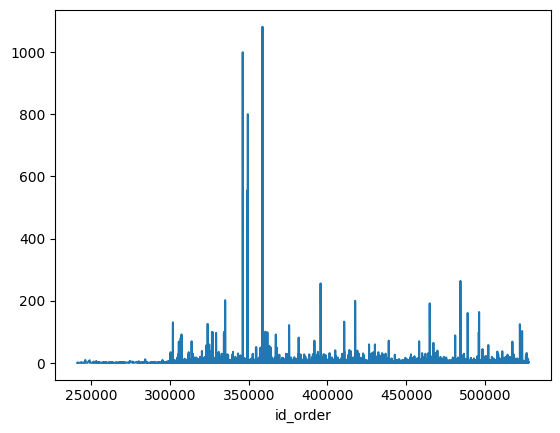

In [231]:
df.groupby('id_order')['product_quantity'].sum().plot()

In [238]:
# df.groupby('id_order')[['product_quantity']].sum().boxplot(by='sku')

# your code here
df.boxplot(column=["product_quantity"],
             by="id_order"
            );


KeyboardInterrupt


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7f2a75959750> (for post_execute):
Error in callback <function flush_figures at 0x7f2a75a38c10> (for post_execute):



KeyboardInterrupt



In [219]:
print(type(df.id_order.value_counts()))

df.id_order.value_counts()#.sort_values(by=['id_order'])

<class 'pandas.core.series.Series'>


id_order
395611    256
484334    140
301934    131
329309     73
349364     72
         ... 
381633      1
381636      1
381638      1
381639      1
527401      1
Name: count, Length: 204855, dtype: int64

In [197]:
df.id_order.nunique()

204855